In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import fft

In [16]:
plt.rcParams['font.size'] = 14

In [17]:
# Load the CO2 data into a DataFrame
df = pd.read_csv(
    'https://gml.noaa.gov/aftp/data/trace_gases/co2/flask/surface/txt/co2_mid_surface-flask_1_ccgg_month.txt',
    delimiter="\s+",skiprows=54, names=['site',	'year',	'month',	'value'])

In [18]:
# Convert 'year' and 'month' to datetime format
df['date'] = pd.to_datetime(df[['year','month']].assign(day=1)).dt.to_period('M')

In [19]:
df = df.set_index('date')

In [20]:
df['months'] = [x.n for x in (df.index-df.index[0])]

In [21]:
df

site  year  month   value  months
date                                     
1985-05  MID  1985      5  350.28       0
1985-06  MID  1985      6  348.82       1
1985-07  MID  1985      7  347.17       2
1985-08  MID  1985      8  344.69       3
1985-09  MID  1985      9  342.39       4
...      ...   ...    ...     ...     ...
2022-08  MID  2022      8  415.60     447
2022-09  MID  2022      9  414.46     448
2022-10  MID  2022     10  416.29     449
2022-11  MID  2022     11  418.60     450
2022-12  MID  2022     12  420.55     451

[452 rows x 5 columns]

In [22]:
import os

# Check the current working directory
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)

# Change to the correct directory if needed
os.chdir("c:\\Users\\User\\OneDrive\\Desktop\\hw5\\23-Homework5G1\\")  # Replace with the actual path

# Check the new working directory
new_directory = os.getcwd()
print("New Working Directory:", new_directory)


Current Working Directory: c:\Users\User\OneDrive\Desktop\hw5\23-Homework5G1
New Working Directory: c:\Users\User\OneDrive\Desktop\hw5\23-Homework5G1


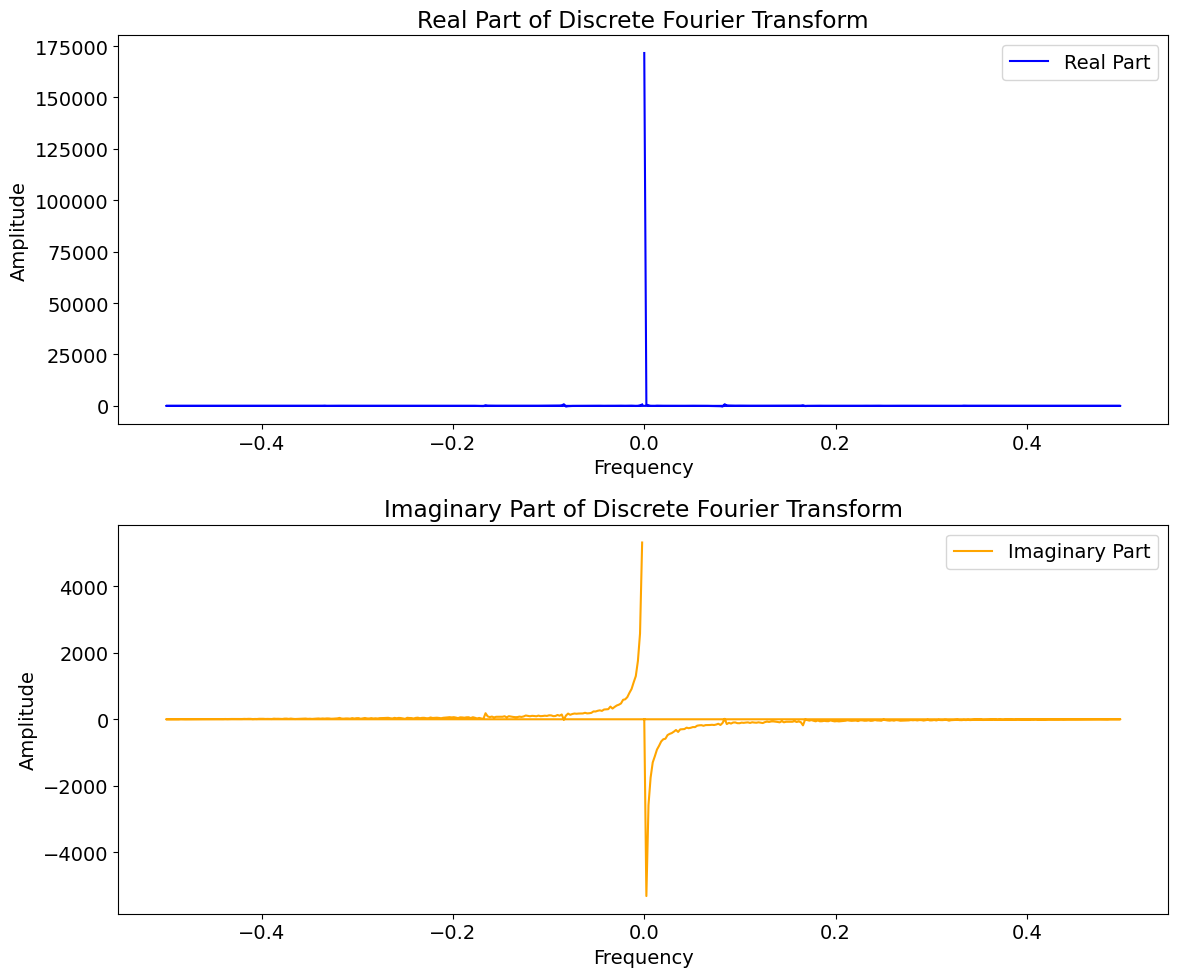

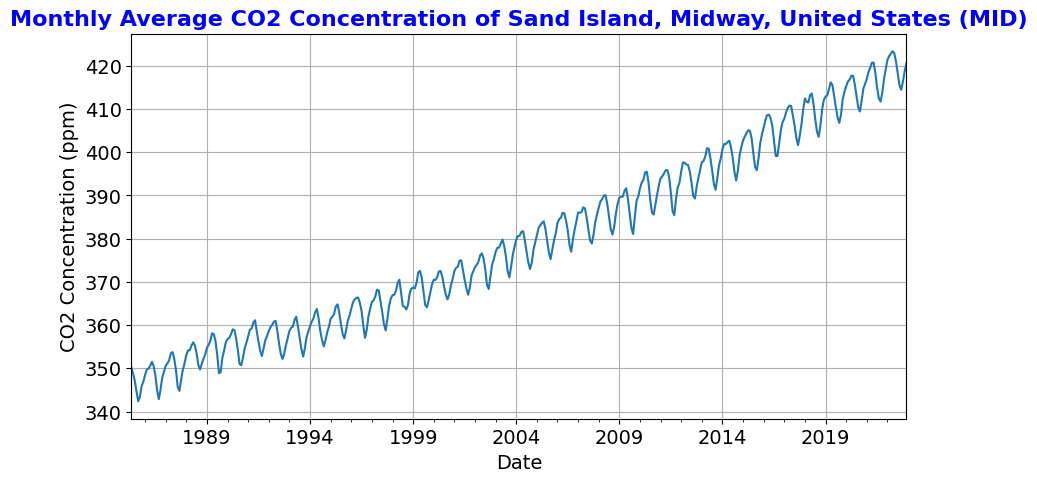

In [23]:
df['value'].plot(figsize=(10, 5), title='Monthly Average CO2 Concentration of Sand Island, Midway, United States (MID)', grid=True)
plt.xlabel('Date')
plt.ylabel('CO2 Concentration (ppm)')

# Increase the font size and make the title bold and blue
plt.title('Monthly Average CO2 Concentration of Sand Island, Midway, United States (MID)', fontsize=16, fontweight='bold', color='blue')

plt.show()

In [24]:
num_data_points = len(df)
print(f"Number of data points: {num_data_points}")

Number of data points: 452


In [ ]:
# Import the function from the fft.py library
from fft import discrete_transform
import pandas as pd

# Load data from a URL into a pandas DataFrame
url = 'https://gml.noaa.gov/aftp/data/trace_gases/co2/flask/surface/txt/co2_mid_surface-flask_1_ccgg_month.txt'
df = pd.read_csv(url, delimiter="\s+", skiprows=54, names=['site', 'year', 'month', 'value'])

# Assuming your complex data is in the 'value' column
data_vector = df['value']

# Use the discrete_transform function
result_dft = discrete_transform(data_vector)

# Display the result or use it as needed
print("Discrete Fourier Transform Result:", result_dft)



In [25]:
# Get the frequencies corresponding to the DFT
N = len(result_dft)
sampling_rate = 1  # Assuming unit sampling rate for simplicity
frequencies = np.fft.fftfreq(N, d=sampling_rate)

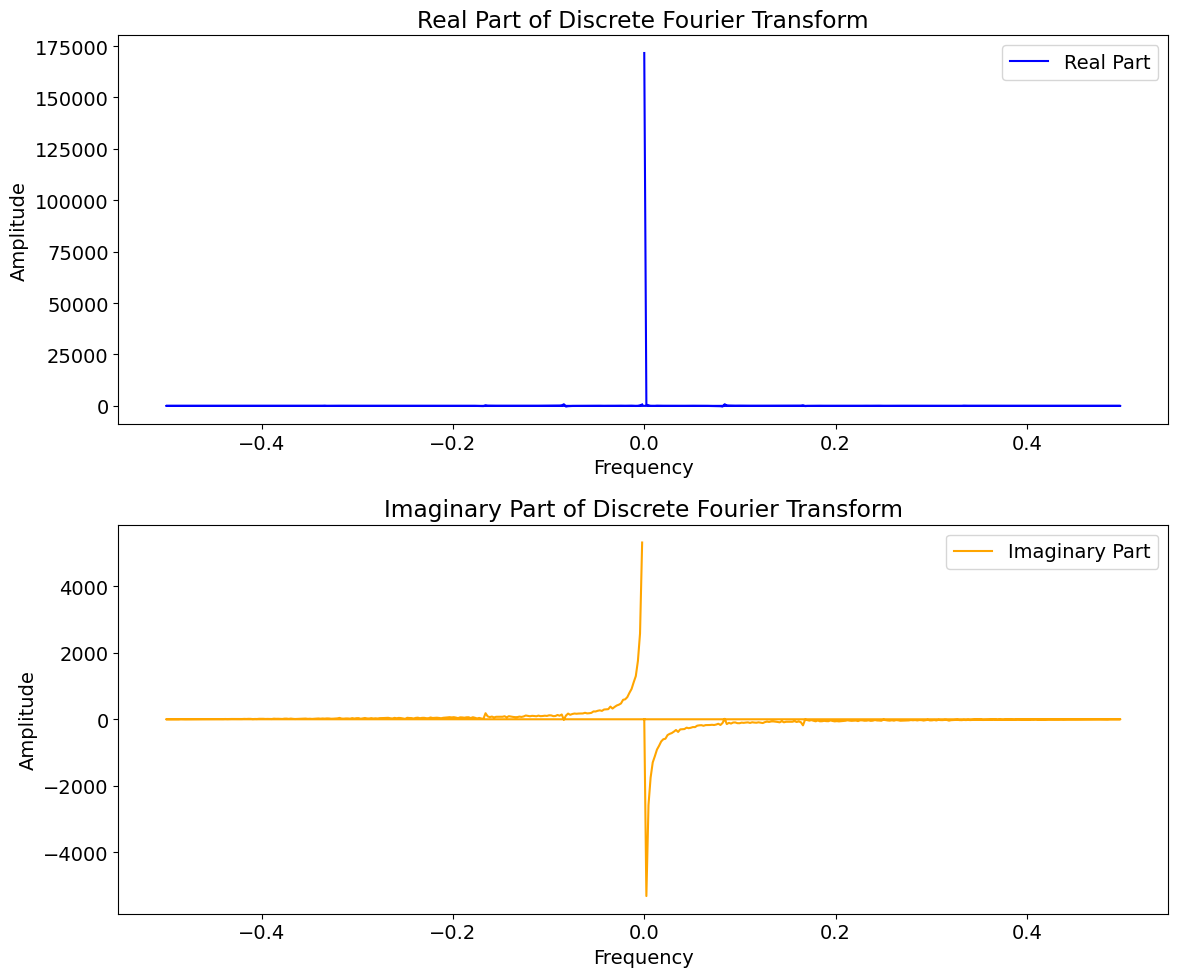

In [26]:
# Plot the real and imaginary parts of the DFT with increased spacing
plt.figure(figsize=(12, 10))

# Plot the real part
plt.subplot(2, 1, 1)
plt.plot(frequencies, result_dft.real, label='Real Part', color='blue')
plt.title('Real Part of Discrete Fourier Transform')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.legend()

# Add some vertical spacing
plt.subplots_adjust(hspace=0.5)

# Plot the imaginary part
plt.subplot(2, 1, 2)
plt.plot(frequencies, result_dft.imag, label='Imaginary Part', color='orange')
plt.title('Imaginary Part of Discrete Fourier Transform')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

In [27]:
def fft(x):    # use our y value from our plot/data as x here...
    N = len(x)
    if N <= 1: return x
    even = fft(x[0::2])
    odd =  fft(x[1::2])
    return np.array( [even[k] + np.exp(-2j*np.pi*k/N)*odd[k] for k in range(N//2)] + \
                     [even[k] - np.exp(-2j*np.pi*k/N)*odd[k] for k in range(N//2)] )

In [28]:
X = fft( df['value'][:256] ) #cutting data into the 2**8 amount

C:\Users\User\AppData\Local\Temp\ipykernel_3004\2659576741.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return np.array( [even[k] + np.exp(-2j*np.pi*k/N)*odd[k] for k in range(N//2)] + \
C:\Users\User\AppData\Local\Temp\ipykernel_3004\2659576741.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [even[k] - np.exp(-2j*np.pi*k/N)*odd[k] for k in range(N//2)] )


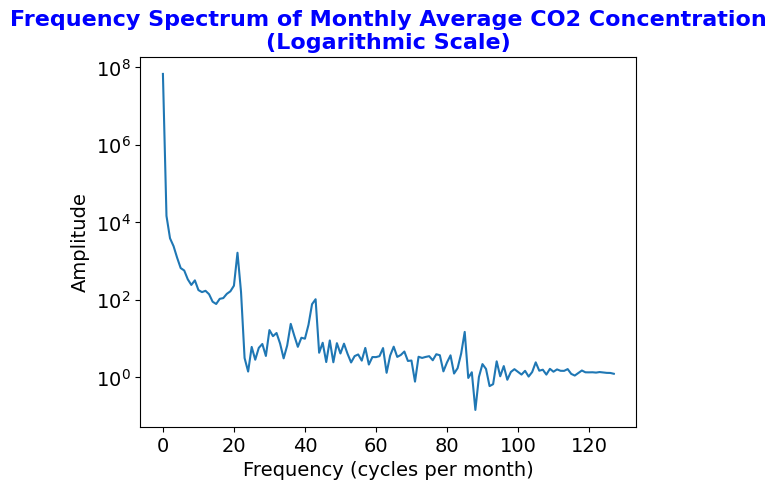

In [29]:
plt.plot(np.abs(X[:int(len(X)/2)])**2/int(len(X)/2))
plt.yscale("log")
#plt.xlim(0,50)

# Add axis labels
plt.xlabel('Frequency (cycles per month)')
plt.ylabel('Amplitude')

plt.title('Frequency Spectrum of Monthly Average CO2 Concentration\n(Logarithmic Scale)', fontsize=16, fontweight='bold', color='blue')

plt.show()